In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score



In [45]:
# Load the data
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [46]:
pd.isnull(df).sum()

review       0
sentiment    0
dtype: int64

In [47]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [48]:
X = df['review']
y = df['sentiment']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
# Define a function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """Train a model and evaluate its performance on the test set."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()
    return accuracy, f1

In [52]:
# Initialize the models
nb_model = MultinomialNB()  # Multinomial Naïve Bayes model
lr_model = LogisticRegression(solver='saga', max_iter=1000) 

In [53]:
# Train and evaluate both models, storing the metrics
print("Evaluating Multinomial Naïve Bayes:")
nb_accuracy, nb_f1 = train_and_evaluate(nb_model, X_train_vec, y_train, X_test_vec, y_test)
print("Evaluating Logistic Regression:")
lr_accuracy, lr_f1 = train_and_evaluate(lr_model, X_train_vec, y_train, X_test_vec, y_test)

Evaluating Multinomial Naïve Bayes:
Model: MultinomialNB
Accuracy: 0.8576
F1-score: 0.8584

Evaluating Logistic Regression:
Model: LogisticRegression
Accuracy: 0.8904
F1-score: 0.8931



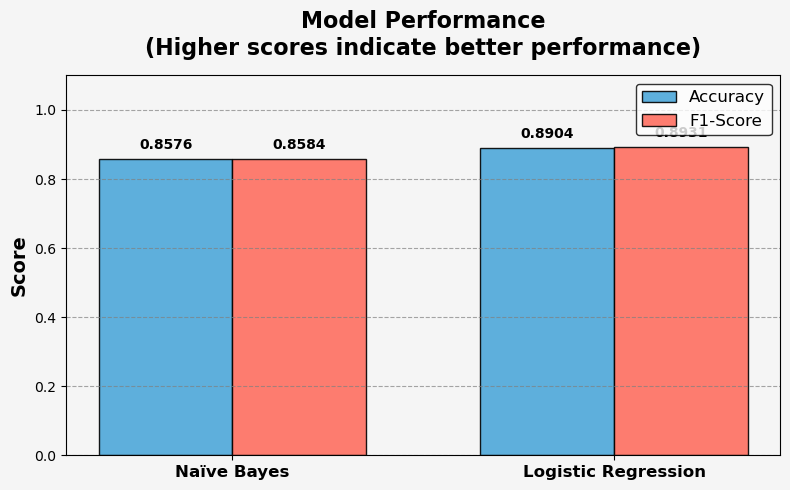

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), facecolor='#f5f5f5')
bar_width, index = 0.35, [0, 1]

for i, (lbl, vals, col) in enumerate([('Accuracy', [nb_accuracy, lr_accuracy], '#4da8da'), ('F1-Score', [nb_f1, lr_f1], '#ff6f61')]):
    x = [j + i * bar_width for j in index]
    plt.bar(x, vals, bar_width, label=lbl, color=col, edgecolor='black', linewidth=1, alpha=0.9)
    [plt.text(xi, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold') for xi, v in zip(x, vals)]
    
plt.xticks([i + bar_width / 2 for i in index], ['Naïve Bayes', 'Logistic Regression'], fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.title('Model Performance\n(Higher scores indicate better performance)', fontsize=16, fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black')
plt.ylim(0, 1.1)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()

In [55]:
# Define a function to predict sentiment for a new review
def predict_sentiment(review, model, vectorizer):
    """Predict sentiment of a review using the specified model."""
    review_vec = vectorizer.transform([review])
    prediction = model.predict(review_vec)
    return 'positive' if prediction[0] == 1 else 'negative'

In [56]:
sample_review = "This movie was fantastic! I really enjoyed it."
print(f"Sample review sentiment (Naïve Bayes): {predict_sentiment(sample_review, nb_model, vectorizer)}")
print(f"Sample review sentiment (Logistic Regression): {predict_sentiment(sample_review, lr_model, vectorizer)}")

Sample review sentiment (Naïve Bayes): positive
Sample review sentiment (Logistic Regression): positive


In [57]:
sample_review = "This film was a complete disaster. The acting was terrible, and the plot made no sense."
print(f"Sample review sentiment (Naïve Bayes): {predict_sentiment(sample_review, nb_model, vectorizer)}")
print(f"Sample review sentiment (Logistic Regression): {predict_sentiment(sample_review, lr_model, vectorizer)}")

Sample review sentiment (Naïve Bayes): negative
Sample review sentiment (Logistic Regression): negative


# Approach
###  Data Loading and Cleaning:

Loads IMDb dataset from IMDb_Dataset.csv.
Drops rows with missing values (if any).

### Label Mapping:

Maps sentiments: 'positive' --> 1, 'negative' --> 0.

### Data Splitting:

Splits data into 80% training and 20% testing sets (random_state=42).

### Text Vectorization:

Applies TfidfVectorizer with lowercase conversion, English stop words removal, and 10,000 max features.
### Model Training and Evaluation:
Trains Multinomial Naive Bayes and Logistic Regression (solver='saga', max_iter=1000).
Evaluates using accuracy and F1-score, printed for both models.

### Prediction Function:
Defines predict_sentiment to classify new reviews using either model.
Testing with Negative Reviews:
Tests five hardcoded negative reviews, printing predictions from both models.

### Visualization:
Creates a bar chart comparing accuracy and F1-scores for both models.


# Challenges
### Text Preprocessing:
Uses basic TF-IDF (lowercasing, stop words); lacks advanced steps like lemmatization or negation handling.
### Feature Selection:
Limits to 10,000 features, which may omit useful terms in a large dataset.
### Model Complexity:
Naive Bayes assumes feature independence, potentially oversimplifying text relationships.
Logistic Regression lacks hyperparameter tuning (e.g., regularization strength).
### Class Balance:
No check for sentiment imbalance; skewed data could bias results.
### Evaluation Metrics:
Relies on accuracy and F1-score; precision or recall could reveal more, especially if imbalanced.
### Visualization:
Simple bar chart; adding data labels or grouping could improve clarity.